In [544]:
import urllib2
import csv
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [270]:
url = 'http://www.census.gov/popest/data/counties/totals/2002/files/2002_co_detail_dataset.csv'
response = urllib2.urlopen(url)
countyPopRaw = pd.read_csv(response, converters={'cty': lambda x: str(x), 'st': lambda x: str(x)})
countyPopRaw['FIPS'] = (countyPopRaw.st + countyPopRaw.cty).str.lstrip("0").astype(float)

In [271]:
countyPopRaw.head()

,cty,st,reg,div,name,stname,census2000pop,estimatesbase2000,popestimate2000,popestimate2001,...,internationalmig2000,internationalmig2001,internationalmig2002,internalmig2000,internalmig2001,internalmig2002,residual2000,residual2001,residual2002,FIPS
0,001,01,3,6,Autauga County,Alabama,43671,43671,43903,44698,...,7,14,11,153,521,645,4,4,6,1001
1,003,01,3,6,Baldwin County,Alabama,140415,140415,141410,144787,...,48,186,185,847,2773,2700,14,20,68,1003
2,005,01,3,6,Barbour County,Alabama,29038,29038,29047,28993,...,14,56,56,-24,-207,-286,1,-9,0,1005
3,007,01,3,6,Bibb County,Alabama,20826,20826,20869,21935,...,2,8,8,208,796,-107,-172,211,-3,1007
4,009,01,3,6,Blount County,Alabama,51024,51024,51213,52143,...,30,121,120,87,585,433,-3,3,13,1009


In [302]:
countyPop = countyPopRaw[['FIPS','popestimate2002','name']]

In [303]:
countyPop.head()

,FIPS,popestimate2002,name
0,1001,45604,Autauga County
1,1003,147932,Baldwin County
2,1005,28826,Barbour County
3,1007,21838,Bibb County
4,1009,52968,Blount County


In [305]:
countyPop.columns=['FIPS','Pop 2002','County Name']

In [306]:
countyPop.head()

,FIPS,Pop 2002,County Name
0,1001,45604,Autauga County
1,1003,147932,Baldwin County
2,1005,28826,Barbour County
3,1007,21838,Bibb County
4,1009,52968,Blount County


In [307]:
vulcanDF = pd.read_csv('CO2_and_PopData.csv')

In [308]:
vulcanDF.columns=['State','County','FIPS','Total CO2 (Mte)']
vulcanDF.head()

,State,County,FIPS,Total CO2 (Mte)
0,AL,Autauga,1001,0.256167
1,AL,Baldwin,1003,0.450031
2,AL,Barbour,1005,0.099370
3,AL,Bibb,1007,0.045945
4,AL,Blount,1009,0.114776


In [309]:
result = pd.merge(vulcanDF,countyPop, how = 'inner', on= 'FIPS')

In [338]:
result

,State,County,FIPS,Total CO2 (Mte),Pop 2002,County Name
0,AL,Autauga,1001,0.256167,45604,Autauga County
1,AL,Baldwin,1003,0.450031,147932,Baldwin County
2,AL,Barbour,1005,0.099370,28826,Barbour County
3,AL,Bibb,1007,0.045945,21838,Bibb County
4,AL,Blount,1009,0.114776,52968,Blount County
5,AL,Bullock,1011,0.031340,11367,Bullock County
6,AL,Butler,1013,0.098010,20911,Butler County
7,AL,Calhoun,1015,0.466963,111616,Calhoun County
8,AL,Chambers,1017,0.084447,36251,Chambers County
9,AL,Cherokee,1019,0.062066,24315,Cherokee County


In [330]:
densityDF = pd.read_csv('Density.csv')
densityDF.head()

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographical Area,Geographical Area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
0,0100000US,NaN,United States,0100000US,NaN,United States,United States,281421906,115904641,3794083.06,256644.62,3537438.44,79.6,32.8
1,0100000US,NaN,United States,0400000US01,1,United States - Alabama,Alabama,4447100,1963711,52419.02,1675.01,50744.00,87.6,38.7
2,0100000US,NaN,United States,0500000US01001,1001,United States - Alabama - Autauga County,Autauga County,43671,17662,604.45,8.48,595.97,73.3,29.6
3,0100000US,NaN,United States,0500000US01003,1003,United States - Alabama - Baldwin County,Baldwin County,140415,74285,2026.93,430.58,1596.35,88.0,46.5
4,0100000US,NaN,United States,0500000US01005,1005,United States - Alabama - Barbour County,Barbour County,29038,12461,904.52,19.61,884.90,32.8,14.1


In [331]:
densityDF = densityDF[['Target Geo Id2','Geographical Area.1','Population','Area in square miles - Total area','Density per square mile of land area - Population']]

In [332]:
densityDF.columns=['FIPS','County Name','Population 2000', 'Total Area (sq mile)','Population per Square Mile']

In [333]:
densityDF.head()

,FIPS,County Name,Population 2000,Total Area (sq mile),Population per Square Mile
0,NaN,United States,281421906,3794083.06,79.6
1,1,Alabama,4447100,52419.02,87.6
2,1001,Autauga County,43671,604.45,73.3
3,1003,Baldwin County,140415,2026.93,88.0
4,1005,Barbour County,29038,904.52,32.8


In [334]:
result2 = pd.merge(result,densityDF, how = 'inner', on= ['FIPS'])

In [337]:
result2

,State,County,FIPS,Total CO2 (Mte),Pop 2002,County Name_x,County Name_y,Population 2000,Total Area (sq mile),Population per Square Mile
0,AL,Autauga,1001,0.256167,45604,Autauga County,Autauga County,43671,604.45,73.3
1,AL,Baldwin,1003,0.450031,147932,Baldwin County,Baldwin County,140415,2026.93,88.0
2,AL,Barbour,1005,0.099370,28826,Barbour County,Barbour County,29038,904.52,32.8
3,AL,Bibb,1007,0.045945,21838,Bibb County,Bibb County,20826,626.16,33.4
4,AL,Blount,1009,0.114776,52968,Blount County,Blount County,51024,650.60,79.0
5,AL,Bullock,1011,0.031340,11367,Bullock County,Bullock County,11714,626.06,18.7
6,AL,Butler,1013,0.098010,20911,Butler County,Butler County,21399,777.92,27.5
7,AL,Calhoun,1015,0.466963,111616,Calhoun County,Calhoun County,112249,612.32,184.5
8,AL,Chambers,1017,0.084447,36251,Chambers County,Chambers County,36583,603.11,61.3
9,AL,Cherokee,1019,0.062066,24315,Cherokee County,Cherokee County,23988,599.95,43.4


In [339]:
cbsaTitles = pd.read_csv('CBSA Title.csv')

In [340]:
cbsaTitles = cbsaTitles[['FIPS','CBSA Title']]

In [341]:
resultDF = pd.merge(result2, cbsaTitles, how = 'inner', on = 'FIPS')

In [342]:
resultDF.head()

,State,County,FIPS,Total CO2 (Mte),Pop 2002,County Name_x,County Name_y,Population 2000,Total Area (sq mile),Population per Square Mile,CBSA Title
0,AL,Autauga,1001,0.256167,45604,Autauga County,Autauga County,43671,604.45,73.3,"Montgomery, AL"
1,AL,Baldwin,1003,0.450031,147932,Baldwin County,Baldwin County,140415,2026.93,88.0,"Daphne-Fairhope, AL"
2,AL,Bibb,1007,0.045945,21838,Bibb County,Bibb County,20826,626.16,33.4,"Birmingham-Hoover, AL"
3,AL,Blount,1009,0.114776,52968,Blount County,Blount County,51024,650.60,79.0,"Birmingham-Hoover, AL"
4,AL,Calhoun,1015,0.466963,111616,Calhoun County,Calhoun County,112249,612.32,184.5,"Anniston-Oxford, AL"


In [500]:
allCBSA = resultDF[['Pop 2002','Total Area (sq mile)','Total CO2 (Mte)']].groupby(resultDF['CBSA Title']).sum()
allCBSA.reset_index()
len(allCBSA)

922

In [585]:
largeCBSA = allCBSA[allCBSA['Pop 2002'] > 100000]
largeCBSA.columns

Index([u'Pop 2002', u'Total Area (sq mile)', u'Total CO2 (Mte)'], dtype='object')

In [586]:
largeCBSA['Population Density'] = largeCBSA['Pop 2002']/largeCBSA['Total Area (sq mile)']
largeCBSA['Carbon Emissions per Capita'] = largeCBSA['Total CO2 (Mte)']/largeCBSA['Pop 2002']
largeCBSA.columns
largeCBSA.columns = ['TotalPop', 'TotalArea', 'TotalEmissions', 'PopDensity', 'EmissionsPerCapita']

/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [587]:
import plotly.plotly as py
from plotly.graph_objs import *

In [589]:
#Xnew = sm.tools.add_constant(np.log(largeCBSA['Population (2002)']))
model1 = sm.formula.ols(formula = 'log(TotalEmissions) ~ log(TotalPop)', data = largeCBSA)
result1 = model1.fit()
print result1.summary()

                             OLS Regression Results                            
Dep. Variable:     log(TotalEmissions)   R-squared:                       0.651
Model:                             OLS   Adj. R-squared:                  0.650
Method:                  Least Squares   F-statistic:                     697.6
Date:                 Sun, 15 Nov 2015   Prob (F-statistic):           1.66e-87
Time:                         11:18:14   Log-Likelihood:                -386.51
No. Observations:                  376   AIC:                             777.0
Df Residuals:                      374   BIC:                             784.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -11.0622      0.433 

In [631]:
# #ax = largeCBSA.plot('TotalPop','TotalEmissions', figsize=(15,8), kind='scatter',
#                     #xlim=(0,20000000), ylim=[0,60], loglog=True)
# #sortedX = largeCBSA.sort('TotalPop')
# seaborn.regplot(log(largeCBSA['TotalPop']), log(largeCBSA['TotalEmissions'])
# seaborn.xlabel('Total Population (2002)', fontsize=15)
# pl.ylabel('Total CO2 Emissions (Mte)', fontsize=15)
# ax.set_title('Log Plot of Total CO2 Emissions (Mte) vs. Population in 2002', fontsize=20)

In [495]:
# ax = largeCBSA.plot('Population Density per Sq Mile','Total CO2 (Mte)', figsize=(15,8), kind='scatter', ylim=0, xlim=0, color = 'green', loglog = True)
# pl.xlabel('Population Density per Square Mile', fontsize=20)
# pl.ylabel('Total CO2 Emissions (Mte)', fontasize=20)
# ax.set_title('Log Plot of Total CO2 Emissions (Mte) vs. Population Density in 2002', fontsize=25)

In [630]:
# ax = largeCBSA.plot('Population Density per Sq Mile','Carbon Emissions per Capita (Mte)', figsize=(15,8), kind='scatter', ylim=0, xlim=0, color = 'indigo', loglog = True)
# pl.xlabel('Log of Population Density per Square Mile', fontsize=15)
# pl.ylabel('Log of Carbon Emissions per Capita (Mte)', fontsize=15)
# ax.set_title('Log Plot of Carbon Emissions per Capita vs. Population Density in 2002', fontsize=20)

In [496]:
# ax = largeCBSA.plot('Population (2002)','Carbon Emissions per Capita (Mte)', figsize=(15,8), kind='scatter', ylim=0, xlim=0, color = 'red', loglog = True)
# pl.xlabel('Total Population (2002)', fontsize=20)
# pl.ylabel('Carbon Emissions per Capita (Mte)', fontsize=20)
# ax.set_title('Log Plot of Carbon Emissions per Capita vs. Total Population in 2002', fontsize=25)

In [518]:
largeCBSA.sort('Carbon Emissions per Capita (Mte)').reset_index().head()

,CBSA Title,Population (2002),Total Area (sq. miles),Total CO2 (Mte),Population Density per Sq Mile,Carbon Emissions per Capita (Mte)
0,"Bremerton-Silverdale, WA",236174,565.98,0.385786,417.283296,0.000002
1,"Brownsville-Harlingen, TX",353561,1276.33,0.589178,277.013782,0.000002
2,"Jacksonville, NC",149003,908.56,0.248845,163.999075,0.000002
3,"Chico, CA",209203,1677.11,0.387643,124.740178,0.000002
4,"Yakima, WA",224823,4311.61,0.427474,52.143631,0.000002


In [519]:
largeCBSA.sort('Carbon Emissions per Capita (Mte)').reset_index().tail()

,CBSA Title,Population (2002),Total Area (sq. miles),Total CO2 (Mte),Population Density per Sq Mile,Carbon Emissions per Capita (Mte)
371,"Manhattan, KS",106379,1888.57,4.928487,56.327804,0.000046
372,"Flagstaff, AZ",120295,18661.21,5.632171,6.446259,0.000047
373,"Pine Bluff, AR",106162,2084.67,5.068528,50.925086,0.000048
374,"Weirton-Steubenville, WV-OH",129663,591.48,6.722961,219.217894,0.000052
375,"Farmington, NM",120367,5538.36,8.453822,21.733329,0.000070


In [459]:
# largeCBSA.to_csv('Large CBSA CO2 and Population.csv')

In [677]:
import seaborn

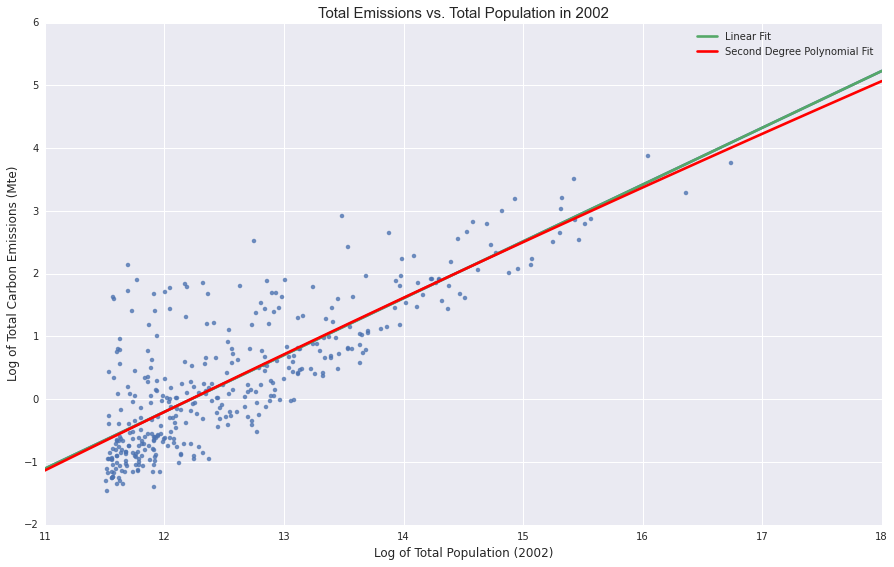

In [682]:
pl.figure(figsize=(15,9))
ax = seaborn.regplot(log(largeCBSA['TotalPop']),log(largeCBSA['TotalEmissions']), ci=0)
seaborn.regplot(log(largeCBSA['TotalPop']),log(largeCBSA['TotalEmissions']), ci=0, order=1,
                label='Linear Fit', scatter = False)
seaborn.regplot(log(largeCBSA['TotalPop']),log(largeCBSA['TotalEmissions']), ci=0, color = 'red',
                    order=2, scatter=False, label= 'Second Degree Polynomial Fit')
pl.legend()
pl.xlabel('Log of Total Population (2002)', fontsize=12)
pl.ylabel('Log of Total Carbon Emissions (Mte)', fontsize=12)
ax.set_title('Total Emissions vs. Total Population in 2002', fontsize=15)

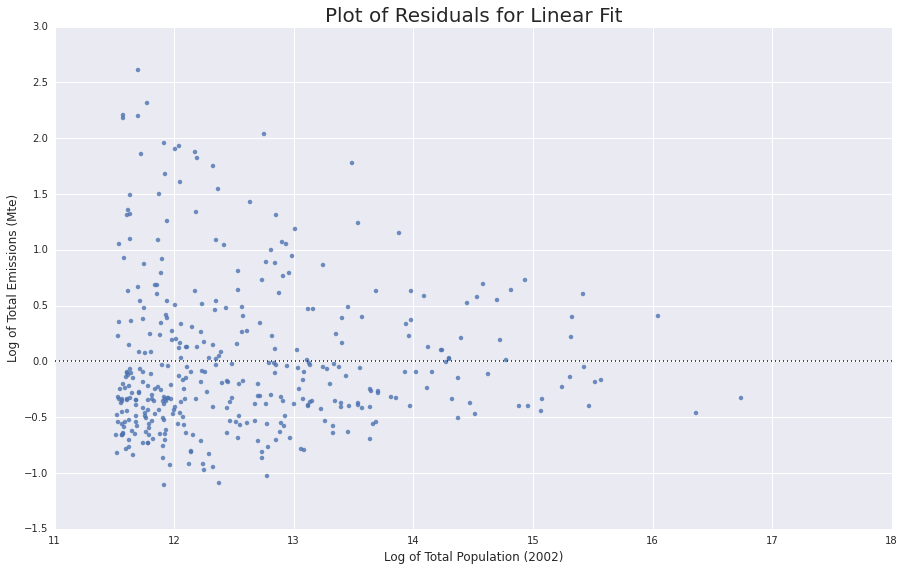

In [695]:
pl.figure(figsize=(15,9))
ax = seaborn.residplot(log(largeCBSA['TotalPop']),log(largeCBSA['TotalEmissions']), order=1)
pl.legend()
pl.xlabel('Log of Total Population (2002)', fontsize=12)
pl.ylabel('Log of Total Emissions (Mte)', fontsize=12)
ax.set_title('Plot of Residuals for Linear Fit',fontsize=20)

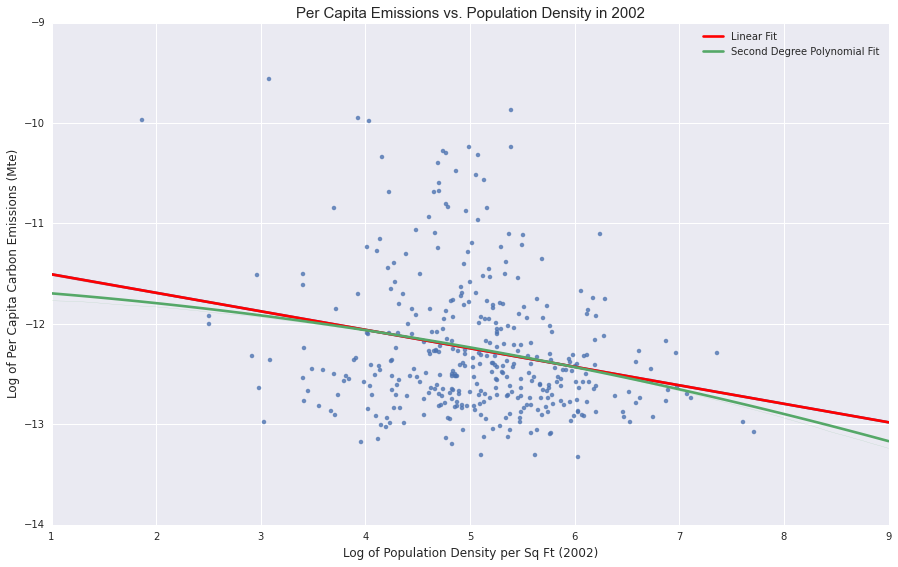

In [662]:
pl.figure(figsize=(15,9))
ax = seaborn.regplot(log(largeCBSA['PopDensity']),log(largeCBSA['EmissionsPerCapita']), ci=0)
seaborn.regplot(log(largeCBSA['PopDensity']),log(largeCBSA['EmissionsPerCapita']),ci=0,color = 'red',
               label = 'Linear Fit', scatter=False)
seaborn.regplot(log(largeCBSA['PopDensity']),log(largeCBSA['EmissionsPerCapita']),
                order=2, ci=0, label = 'Second Degree Polynomial Fit', scatter=False)
pl.legend()
pl.xlabel('Log of Population Density per Sq Ft (2002)', fontsize=12)
pl.ylabel('Log of Per Capita Carbon Emissions (Mte)', fontsize=12)
ax.set_title('Per Capita Emissions vs. Population Density in 2002', fontsize=15)


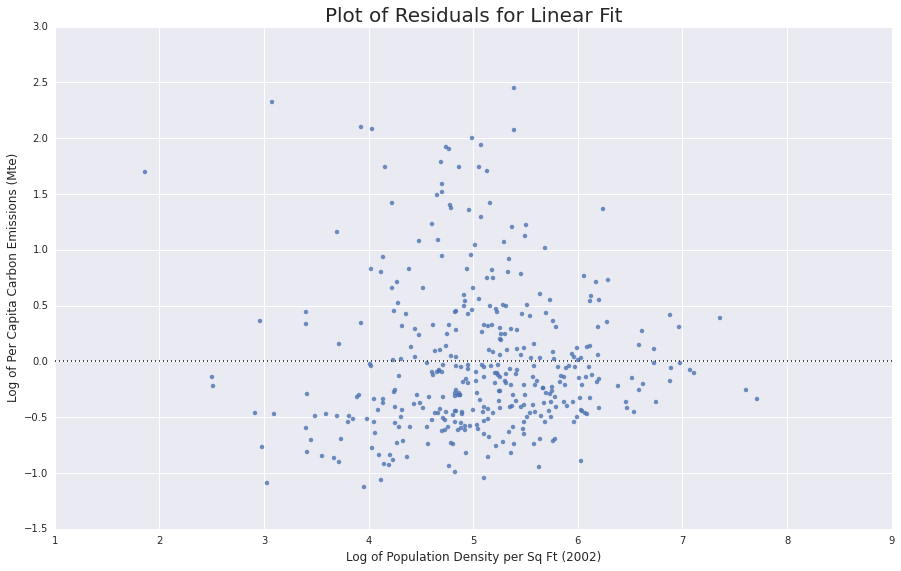

In [696]:
pl.figure(figsize=(15,9))
ax = seaborn.residplot(log(largeCBSA['PopDensity']),log(largeCBSA['EmissionsPerCapita']), order=1)
pl.legend()
pl.xlabel('Log of Population Density per Sq Ft (2002)', fontsize=12)
pl.ylabel('Log of Per Capita Carbon Emissions (Mte)', fontsize=12)
ax.set_title('Plot of Residuals for Linear Fit',fontsize=20)

In [683]:
model2 = sm.formula.ols(formula = 'log(EmissionsPerCapita) ~ log(PopDensity)', data = largeCBSA)
result2 = model2.fit()
print result2.summary()

                               OLS Regression Results                              
Dep. Variable:     log(EmissionsPerCapita)   R-squared:                       0.053
Model:                                 OLS   Adj. R-squared:                  0.051
Method:                      Least Squares   F-statistic:                     20.95
Date:                     Sun, 15 Nov 2015   Prob (F-statistic):           6.42e-06
Time:                             19:13:07   Log-Likelihood:                -380.07
No. Observations:                      376   AIC:                             764.1
Df Residuals:                          374   BIC:                             772.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------

In [684]:
curvemodel = sm.formula.ols(formula = "y ~ x1 + I((x1))+I((x1)**2)",
                    data={'x1':log(largeCBSA['PopDensity']),'y':log(largeCBSA['EmissionsPerCapita'])}).fit()
print curvemodel.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     10.55
Date:                Sun, 15 Nov 2015   Prob (F-statistic):           3.50e-05
Time:                        19:13:07   Log-Likelihood:                -379.98
No. Observations:                 376   AIC:                             766.0
Df Residuals:                     373   BIC:                             777.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -11.6232      0.724    -16.058   

In [685]:
curvemodel2 = sm.formula.ols(formula = "y ~ x1 + I((x1))+I((x1)**2)",
                    data={'x1':log(largeCBSA['TotalPop']),'y':log(largeCBSA['TotalEmissions'])}).fit()
print curvemodel2.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     348.0
Date:                Sun, 15 Nov 2015   Prob (F-statistic):           5.27e-86
Time:                        19:13:11   Log-Likelihood:                -386.46
No. Observations:                 376   AIC:                             778.9
Df Residuals:                     373   BIC:                             790.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -12.4102      4.582     -2.709   